# EXPLORATORY DATA ANALYSIS IN PYTHON

Course offered by: DataCamp

By: Mokete Mashala

Date: January 2023

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import scipy.interpolate
import statsmodels.formula.api as smf

In [2]:
#put r at the beginning to be able to read the file

nsfg = pd.read_hdf(r'C:\Users\moket\Personal Practice\nsfg.hdf5', 'nsfg')

In [3]:
##Display the number of rows and columns
nsfg.shape


(9358, 10)

In [4]:
# Display the names of the columns

nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [5]:
# Select column birthwgt_oz1: ounces
# Print the first 5 elements of ounces

ounces = nsfg['birthwgt_oz1']
print(ounces.head())

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


# CLEAN AND VALIDATE

Before we do anything with this data, we have to validate it. One part of validation is confirming that we are interpreting the data correctly. 

value_counts(): to see what values appear in pounds and how many times each value appears. 
describe(): Another way to validate the data is with describe(), which computes summary statistics like the mean, standard deviation, min, and max. 
replace(): The replace() method does what we want; it takes a list of values we want to replace and the value we want to replace them with. np dot nan means we are getting the special value NaN from the NumPy library, which is imported as np. The result from replace() is a new Series.


In [6]:
#How many pregnancies in this dataset ended with a live birth?
# 1 = Live birth, 2 = Induced abortion, 3 = Stillbirth, 4 = Miscarriage, 
#5 = Ectopic pregnancy, 6 = Current pregnancy

nsfg['outcome'].value_counts().sort_index()

1    6489
2     947
3      86
4    1469
5     118
6     249
Name: outcome, dtype: int64

In [7]:
#If you use value_counts() to view the responses, you'll see that the value 8 appears once, and if you consult the codebook, you'll see that this value 
#indicates that the respondent refused to answer the question.

print(nsfg['nbrnaliv'].value_counts())

# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace(8, np.nan, inplace = True)

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64
1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


In [8]:
#For each pregnancy in the NSFG dataset, the variable 'agecon' encodes the 
#respondent's age at conception, and 'agepreg' the respondent's age at the end of the pregnancy.

#Both variables are recorded as integers with two implicit decimal places, 
#so the value 2575 means that the respondent's age was 25.75.

# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Compute the difference
preg_length = agepreg - agecon

# Compute summary statistics
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


## FILTER AND VISUALIZATION

Histograms are one of the most useful tools in exploratory data analysis. They quickly give you an overview of the distribution of a variable, that is, what values the variable can have, and how many times each value appears.

As we saw in a previous exercise, the NSFG dataset includes a variable 'agecon' that records age at conception for each pregnancy. Here, you're going to plot a histogram of this variable. You'll use the bins parameter that you saw in the video, and also a new parameter - histtype - which you can read more about here in the matplotlib documentation. Learning how to read documentation is an essential skill. If you want to learn more about matplotlib, you can check out DataCamp's Introduction to Data Visualization with Matplotlib course.

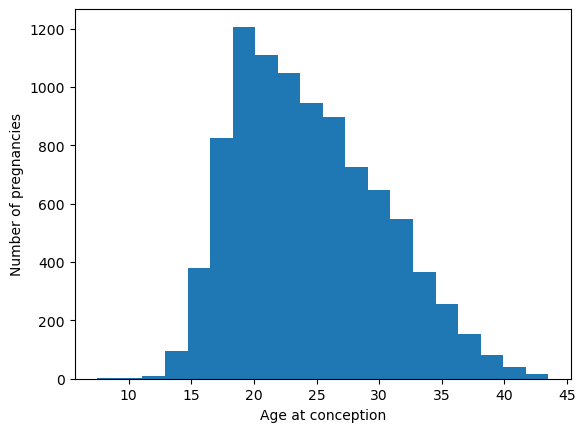

In [9]:
# Plot the histogram
plt.hist(agecon, bins=20)

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

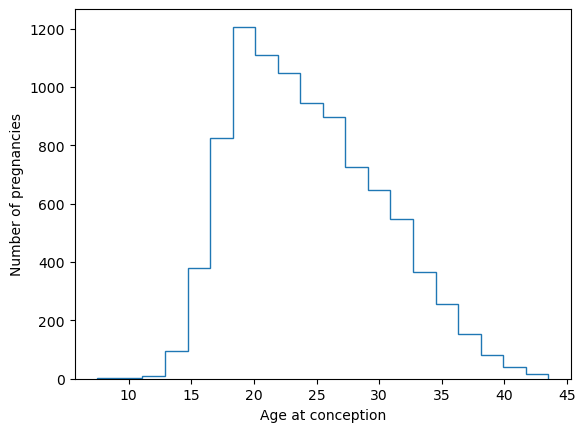

In [10]:
# Plot the histogram
plt.hist(agecon, bins=20, histtype='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

In [11]:
pounds = nsfg['birthwgt_lb1']
ounces = nsfg['birthwgt_oz1']

print(pounds.value_counts().sort_index)
print(ounces.value_counts().sort_index)

<bound method Series.sort_index of 7.0     2146
6.0     1666
8.0     1168
5.0      586
9.0      363
4.0      196
99.0      94
10.0      82
3.0       67
2.0       47
1.0       34
11.0      17
12.0       7
0.0        6
14.0       2
13.0       2
98.0       1
17.0       1
Name: birthwgt_lb1, dtype: int64>
<bound method Series.sort_index of 0.0     757
6.0     543
8.0     518
2.0     429
11.0    418
5.0     407
3.0     393
12.0    388
4.0     386
9.0     377
7.0     346
1.0     297
10.0    295
13.0    275
15.0    268
14.0    258
99.0     35
98.0      1
Name: birthwgt_oz1, dtype: int64>


In [12]:
# Acoording to document,  98, and 99 indicate missing data. Therefore replace with NaN

pounds.replace([98,99], np.nan, inplace = True)
ounces.replace([98,99], np.nan, inplace=True)

birth_weight = pounds + ounces/16
birth_weight


0       5.2500
1       4.7500
2       5.2500
3          NaN
4       8.8125
         ...  
9353    4.6875
9354    8.4375
9355    7.3750
9356    8.1875
9357    8.3125
Length: 9358, dtype: float64

Compute birth weight
Now let's pull together the steps in this chapter to compute the average birth weight for full-term babies.

In [13]:
# Create a Boolean Series for full-term babies. Make a Boolean Series called 
#full_term that is true for babies with 'prglngth' greater than or equal to 37 weeks.

full_term = nsfg['prglngth'] >= 37

# Select the weights of full-term babies

full_term_weight = birth_weight[full_term]

# Compute the mean weight of full-term babies. The actual data is not 
#representative of polulation.in the expecise a resampling of data was done
#using a user defined function. Consider update in future
#resample_rows_weighted, that takes the NSFG data and resamples it using the 
#sampling weights in wgt2013_2015. The result is a sample that is 
#representative of the U.S. population.


print(full_term_weight.mean())

7.372323879231473


In [14]:
# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
#Use the variable 'nbrnaliv' to make a Boolean Series that is True for single 
#births (where 'nbrnaliv' equals 1) and False otherwise.

single = nsfg['nbrnaliv'] == 1

# Compute birth weight for single full-term babies

single_full_term_weight = birth_weight[full_term & single]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
# we can use the tilde operator, which is "logical NOT" or inverse; it makes 
#the Trues false and the Falses true.

mult_full_term_weight = birth_weight[full_term & ~single]
print('Multiple full-term mean:', mult_full_term_weight.mean())


Single full-term mean: 7.385643450184502
Multiple full-term mean: 5.768055555555556


# DISTRIBUTIONS

Probability Mass Functions (PMFs) and Cumulative Distribution Functions (CDFs)
Data used for this section is gss: The General Social Survey, or GSS, has run annually since 1972; it surveys a representative sample of the adult population in the U.S. and asks questions about demographics and beliefs about social and political issues. It is widely used by politicians, policy makers, and researchers. 

In [15]:
gss = pd.read_hdf(r'C:\Users\moket\Personal Practice\gss.hdf5', 'gss')

In [16]:
#educ records the number of years of education for each respondent!
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


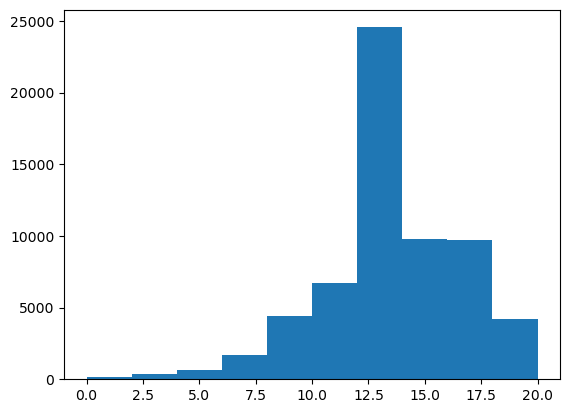

In [17]:
# With a histogram, drop the na because histograms do not work well with missing data

educ = gss['educ']
plt.hist(educ.dropna(), label = 'educ')
plt.show()

An alternative is a probability mass function, or PMF, that contains the unique values in the dataset and how often each one appears.

In [18]:
pip install empiricaldist

Note: you may need to restart the kernel to use updated packages.


In [19]:
# PMF (probability mass function) with normalization
from empiricaldist import Pmf
pmf_educ = Pmf.from_seq(educ, normalize=False)
pmf_educ.head()

,probs
0.0,144
1.0,38
2.0,151


In [20]:
pmf_educ[12]

19145

Normalize
Usually when we make a PMF, we want to know the fraction of respondents with each value, rather than the counts. We can do that by setting normalize=True; then we get a normalized PMF, that is, a PMF where the frequencies add up to 1.

In [21]:
pmf_educ = Pmf.from_seq(educ, normalize=True)
pmf_educ.head()

,probs
0.0,0.002311
1.0,0.000610
2.0,0.002424


In [22]:
# Now if we use the bracket operator, the result is a fraction.
pmf_educ[12]

0.3072836414997432

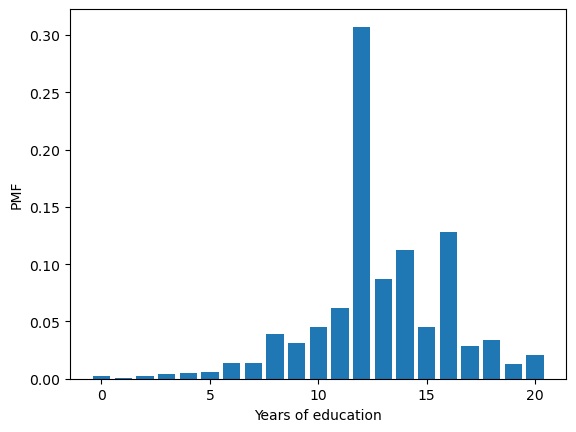

In [23]:
# Plot
pmf_educ.bar(label='educ')
plt.xlabel('Years of education')
plt.ylabel('PMF')
plt.show()

## Make a PMF

The GSS dataset has been pre-loaded for you into a DataFrame called gss. You can explore it in the IPython Shell to get familiar with it.

In [24]:
# Compute the PMF for year
pmf_year = Pmf.from_seq(gss['year'], normalize=False)

# Print the result
print(pmf_year)

1972    1613
1973    1504
1974    1484
1975    1490
1976    1499
1977    1530
1978    1532
1980    1468
1982    1860
1983    1599
1984    1473
1985    1534
1986    1470
1987    1819
1988    1481
1989    1537
1990    1372
1991    1517
1993    1606
1994    2992
1996    2904
1998    2832
2000    2817
2002    2765
2004    2812
2006    4510
2008    2023
2010    2044
2012    1974
2014    2538
2016    2867
Name: , dtype: int64


## Plot a PMF

In [25]:
# Select the age column
age = gss['age']

# Make a PMF of age
pmf_age = Pmf.from_seq(age)

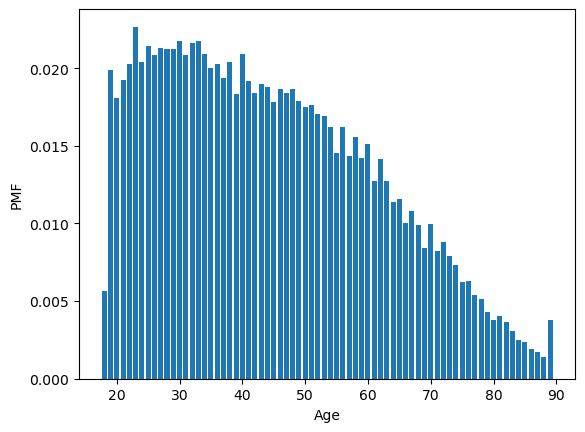

In [26]:
# Plot the PMF
pmf_age.bar(label='pmf_age')

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

## Cumulative distribution functions (CDF)

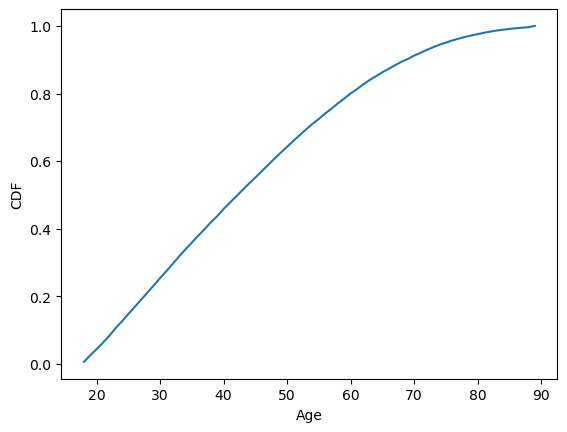

In [27]:
from empiricaldist import Cdf
cdf = Cdf.from_seq(gss['age'])
cdf.plot()
plt.xlabel('Age')
plt.ylabel('CDF')
plt.show()

### Evaluating the CDF
The Cdf object can be used as a function, so if you give it an age, it returns the corresponding probability. In this example, the age is the quantity, q, which is 51. The corresponding probability is p, which is 0.66. That means that about 66% of the respondents are 51 years old or younger.

In [28]:
q = 51
p = cdf(q)
print(p)

0.6602013455146835


### Evaluating the inverse CDF
The CDF is an invertible function, which means that if you have a probability, p, you can look up the corresponding quantity, q. For a probability of 0.25, the age returned is 30. That means that 25% of the respondents are age 30 or less. Another way to say the same thing is "age 30 is the 25th percentile of this distribution".
A probability 0.75, which returns 57, so 75% of the respondents are 57 or younger.

In [29]:
p = 0.25
q = cdf.inverse(p)
print(q)

30.0


In [30]:
p = 0.75
q = cdf.inverse(p)
print(q)

57.0


### Make a CDF

Make a CDF and use it to determine the fraction of respondents in the GSS dataset who are OLDER than 30.

In [38]:
# Select the age column
age = gss['age']

# Compute the CDF of age
cdf_age = Cdf.from_seq(age)

# Calculate the CDF of 30
print(cdf_age[30])

0.2539137136526389


### Plot a cdf

The distribution of income in almost every country is long-tailed; that is, there are a small number of people with very high incomes.

In the GSS dataset, the variable 'realinc' represents total household income, converted to 1986 dollars. We can get a sense of the shape of this distribution by plotting the CDF.

<AxesSubplot:>

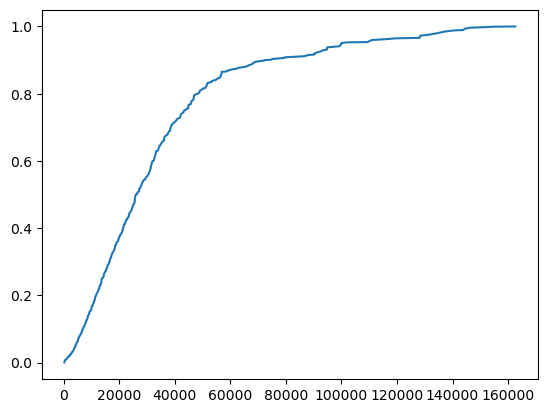

In [39]:
# Select realinc
income = gss['realinc']

# Make the CDF
cdf_income = Cdf.from_seq(income)

# Plot CDF
cdf_income.plot()


### Compute IQR

The interquartile range (IQR) is the difference between the 75th and 25th percentiles. It is a measure of variability that is robust in the presence of errors or extreme values.

In [40]:
# Calculate the 75th percentile 
percentile_75th = cdf_income.inverse(0.75)
print(percentile_75th)

# Calculate the 25th percentile
percentile_25th = cdf_income.inverse(0.25)
print(percentile_25th)

# Calculate the interquartile range
iqr = percentile_75th - percentile_25th

# Print the interquartile range
print(iqr)

43426.0
13750.0
29676.0


### Comparing distributions

One way to compare distributions is to plot multiple PMFs on the same axes. For example, suppose we want to compare the distribution of age for male and female respondents.

First I'll create a boolean Series that's true for male respondents. And I'll extract the age column. Now I can select ages for the male and female respondents. And plot a Pmf for each.

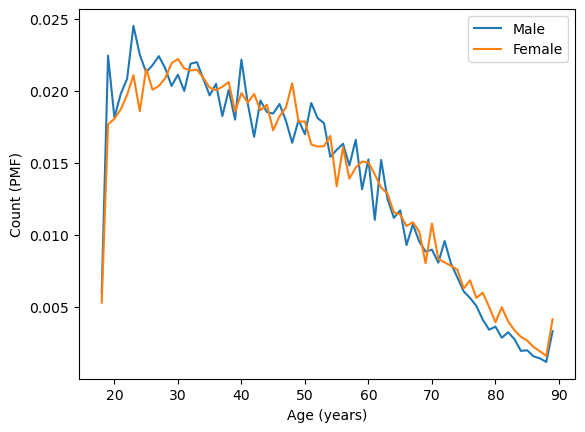

In [41]:
male = gss['sex'] == 1
age = gss['age']

male_age = age[male]
female_age = age[~male]

Pmf.from_seq(male_age).plot(label='Male')
Pmf.from_seq(female_age).plot(label='Female')

plt.xlabel('Age (years)')
plt.ylabel('Count (PMF)')
plt.legend()
plt.show()


Here's the result. It looks like there are more men in their twenties, maybe. And there are more women in their 70s and 80s. In between, the plot is pretty noisy; most of these differences are just random variations.

We can do the same thing with CDFs. Here's the code: everything is the same except I replaced Pmf with Cdf.

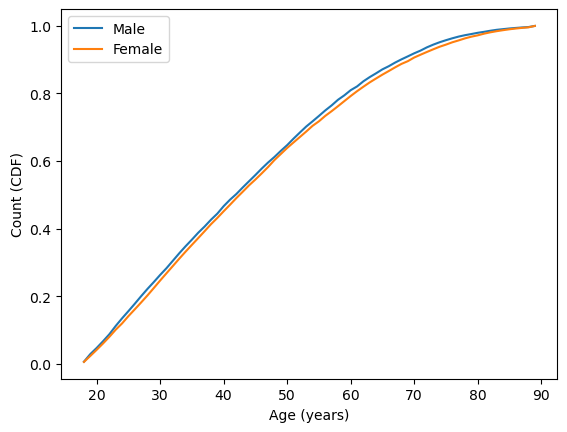

In [42]:
Cdf.from_seq(male_age).plot(label='Male')
Cdf.from_seq(female_age).plot(label='Female')

plt.xlabel('Age (years)')
plt.ylabel('Count (CDF)')
plt.legend()
plt.show()

And here is the result. In general, CDFs are smoother than PMFs. Because they smooth out randomness, we can often get a better view of real differences between distributions. In this case, the lines overlap over the whole range; that is, the distributions are nearly identical. But we can see the blue line to the left of the orange line across the distribution, which shows that men are younger at every percentile. Or, another way to think of it: for every age, the fraction of men below that age is more than the fraction of women below that age. But not by very much.

### Income PMFs

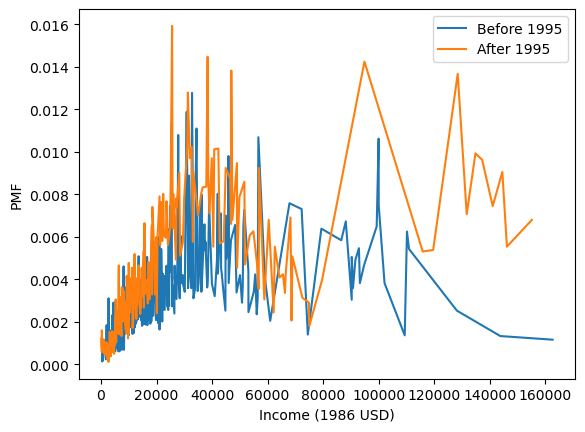

In [43]:
income = gss['realinc']
pre95 = gss['year'] < 1995

Pmf.from_seq(income[pre95]).plot(label='Before 1995')
Pmf.from_seq(income[~pre95]).plot(label='After 1995')

plt.xlabel('Income (1986 USD)')
plt.ylabel('PMF')
plt.legend()
plt.show()

Here's what it looks like. There are a lot of unique values in this distribution, and none of them appear very often. The PMF is so noisy, we can't really see the shape of the distribution. It looks like there are more people with high incomes after 1995, but it's hard to tell. We can get a clearer picture with a CDF.

### Income CDFs

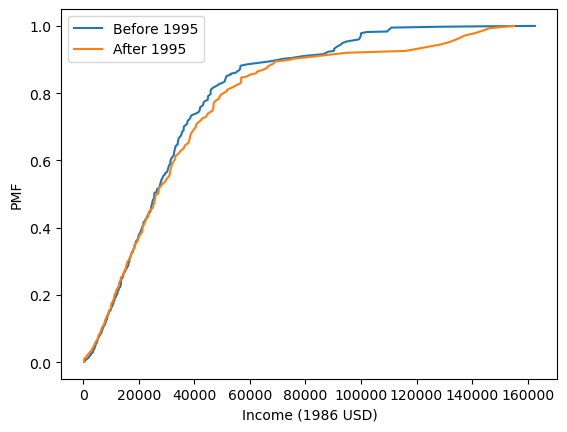

In [44]:
Cdf.from_seq(income[pre95]).plot(label='Before 1995')
Cdf.from_seq(income[~pre95]).plot(label='After 1995')

plt.xlabel('Income (1986 USD)')
plt.ylabel('PMF')
plt.legend()
plt.show()

And here are the results. Below $30,000 the CDFs are almost identical; above that, we can see that the orange distribution is shifted to the right. In other words, the fraction of people with high incomes is about the same, but the income of high earners has increased.

In general, for exploratory analysis CDFs is recommended. They give you a clear view of the distribution, without too much noise, and they are good for comparing distributions, especially if you have more than two.

### Distribution of education

In [45]:
years = gss['educ']

Cdf.from_seq(years)[12]

0.5322611710323575

### Extract education levels

Let's create Boolean Series to identify respondents with different levels of education.

In the U.S, 12 years of education usually means the respondent has completed high school (secondary education). A respondent with 14 years of education has probably completed an associate degree (two years of college); someone with 16 years has probably completed a bachelor's degree (four years of college).

Complete the line that identifies respondents with associate degrees, that is, people with 14 or more years of education but less than 16.
Complete the line that identifies respondents with 12 or fewer years of education.
Confirm that the mean of high is the fraction we computed in the previous exercise, about 53%.

In [46]:
# Select educ
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = (educ >= 14) & (educ < 16)

# High school (12 or fewer years of education)
high = (educ <= 12)
print(high.mean())

0.5308807991547402


### Plot income CDFs

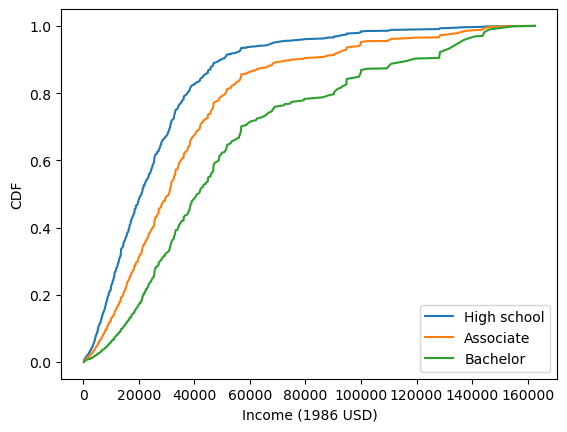

In [47]:
income = gss['realinc']

# Plot the CDFs
Cdf.from_seq(income[high]).plot(label='High school')
Cdf.from_seq(income[assc]).plot(label='Associate')
Cdf.from_seq(income[bach]).plot(label='Bachelor')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()

It might not be surprising that people with more education have higher incomes, but looking at these distributions, we can see where the differences are.

## Modeling distributions

### The normal distribution

Let's start with the normal distribution, also called the Gaussian distribution. It turns out that many things we measure in the world have distributions that are well approximated by a normal distribution. To get a sense of what the normal distribution looks like, I'll use the NumPy random module to generate 1000 random values from a normal distribution. And plot their CDF.

<AxesSubplot:>

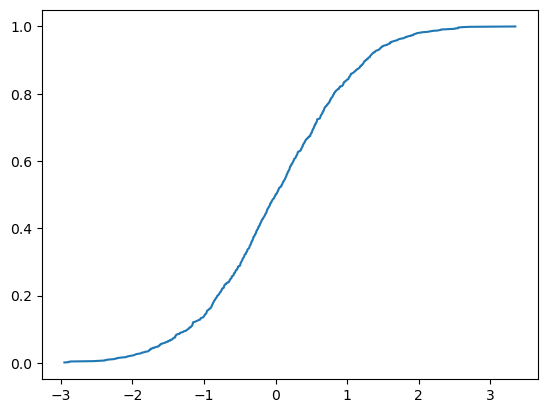

In [48]:
import numpy as np
sample = np.random.normal(size=1000)
Cdf.from_seq(sample).plot()

This sigmoid shape is what we expect to see with values from a normal distribution.

### The normal CDF

SciPy provides an object called norm that represents the normal distribution. I'll use np.linspace() to create an array of equally-spaced points from -3 to 3. norm(0, 1) creates an object that represents a normal distribution with mean 0 and standard deviation 1. .cdf() evaluates the CDF of the normal distribution. I'll plot the results with a gray line. And then plot the CDF of the sample again.

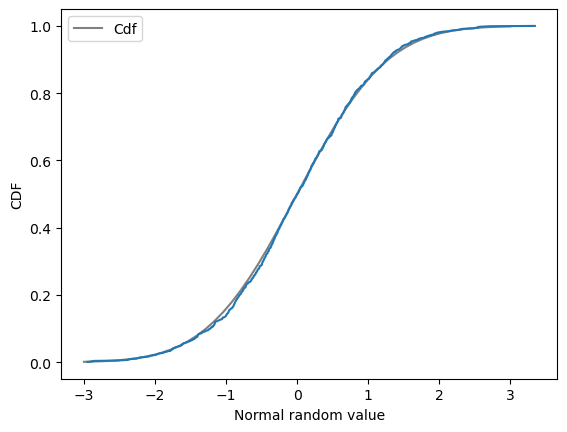

In [50]:
from scipy.stats import norm

xs = np.linspace(-3, 3)
ys = norm(0, 1).cdf(xs)

plt.plot(xs, ys, color='gray', label='Cdf')

Cdf.from_seq(sample).plot()

plt.xlabel('Normal random value')
plt.ylabel('CDF')
plt.legend()
plt.show()

### The bell curve

The norm object also provides .pdf(), which evaluates the probability density function, or PDF. And here's what that looks like.

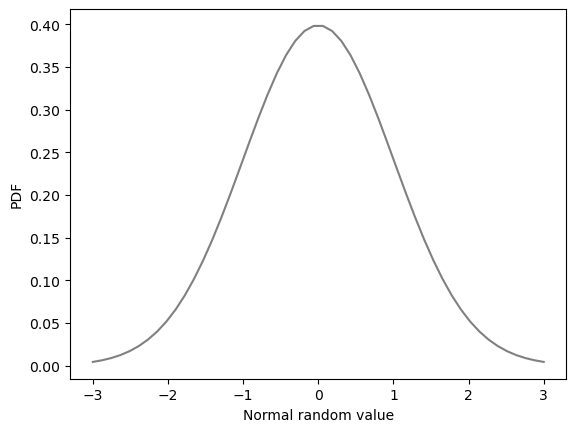

In [51]:
xs = np.linspace(-3, 3)
ys = norm(0, 1).pdf(xs)
plt.plot(xs, ys, color='gray')
plt.xlabel('Normal random value')
plt.ylabel('PDF')
plt.show()

It's the classic bell curve. Unfortunately, if we compare this PDF to the PMF of the sample, it doesn't work very well.

### KDE plot

<AxesSubplot:ylabel='Density'>

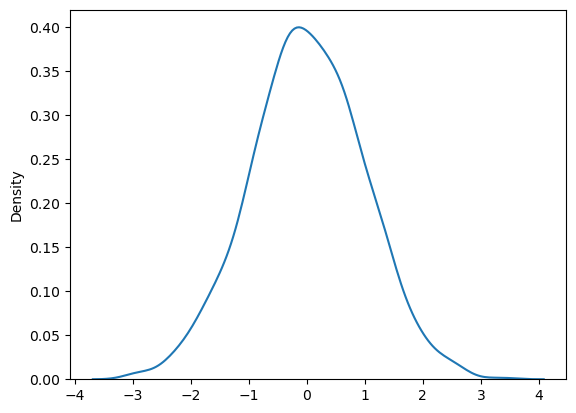

In [53]:
import seaborn as sns
sns.kdeplot(sample)

### KDE and PDF

<AxesSubplot:ylabel='Density'>

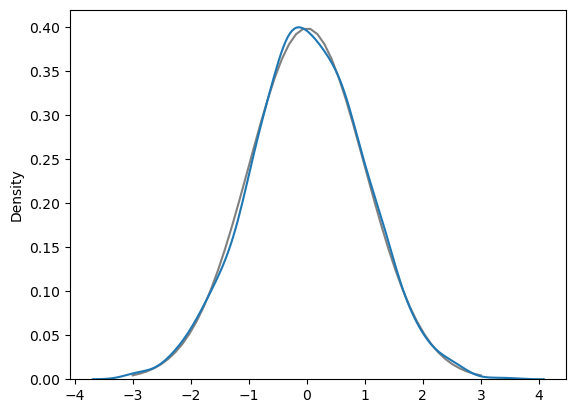

In [54]:
xs = np.linspace(-3, 3)
ys = norm.pdf(xs)
plt.plot(xs, ys, color='gray')
sns.kdeplot(sample)

The KDE plot matches the normal PDF pretty well, although the differences look bigger when we compare PDFs than they did with the CDFs. On one hand, that means that the PDF is a more sensitive way to look for differences, but often it is too sensitive. It's hard to tell whether apparent differences mean anything, or if they are just random, as in this case.

### PMF, CDF, KDE

To summarize, we've seen three ways to visualize distributions, PMFs, CDFs, and KDE.

In general, I use CDFs when I am exploring data. I think they give the best view of what's going on without getting distracted by noise. The biggest drawback of CDFs is that they are less well known. If I am presenting results to an audience unfamiliar with CDFs, I'll use PMFs for distributions with a small number of unique values and KDE if there are a lot of values.

### Distribution of income

Distribution of income
In many datasets, the distribution of income is approximately lognormal, which means that the logarithms of the incomes fit a normal distribution. We'll see whether that's true for the GSS data. As a first step, you'll compute the mean and standard deviation of the log of incomes using NumPy's np.log10() function.

Then, you'll use the computed mean and standard deviation to make a norm object using the scipy.stats.norm() function.

Extract 'realinc' from gss and compute its logarithm using np.log10().
Compute the mean and standard deviation of the result.
Make a norm object by passing the computed mean and standard deviation to norm().

In [55]:
# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = log_income.mean()
std = log_income.std()
print(mean, std)

# Make a norm object
from scipy.stats import norm
dist = norm(mean, std)

4.371148677933652 0.4290082383271419


### Comparing CDFs

To see whether the distribution of income is well modeled by a lognormal distribution, we'll compare the CDF of the logarithm of the data to a normal distribution with the same mean and standard deviation. These variables from the previous exercise are available for use:

Be careful with capitalization: Cdf(), with an uppercase C, creates Cdf objects. dist.cdf(), with a lowercase c, evaluates the normal cumulative distribution function.

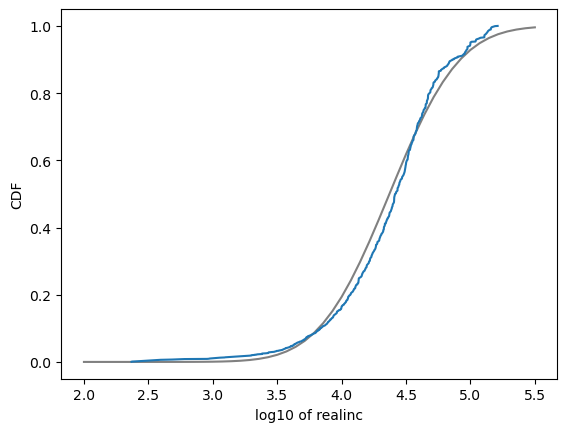

In [56]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
Cdf.from_seq(log_income).plot()
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

The lognormal model is a pretty good fit for the data, but clearly not a perfect match. That's what real data is like; sometimes it doesn't fit the model.

### Comparing PDFs

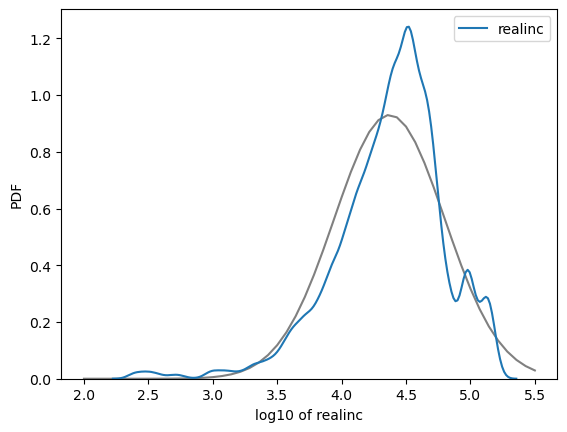

In [58]:
# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income, label='realinc')

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.legend()
plt.show()

# Relationships

Use data from the Behavioral Risk Factor Surveillance Survey, or BRFSS, which is run by the Centers for Disease Control. The survey includes more than 400,000 respondents, but to keep things manageable, we'll use a random subsample of 100,000.

In [64]:
brfss = pd.read_hdf(r'C:\Users\moket\Personal Practice\brfss.hdf5', 'brfss')

In [65]:
brfss.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


## PMF of age

PMF of age
Do people tend to gain weight as they get older? We can answer this question by visualizing the relationship between weight and age. But before we make a scatter plot, it is a good idea to visualize distributions one variable at a time. Here, you'll visualize age using a bar chart first. Recall that all PMF objects have a .bar() method to make a bar chart.

The BRFSS dataset includes a variable, 'AGE' (note the capitalization!), which represents each respondent's age. To protect respondents' privacy, ages are rounded off into 5-year bins. 'AGE' contains the midpoint of the bins.

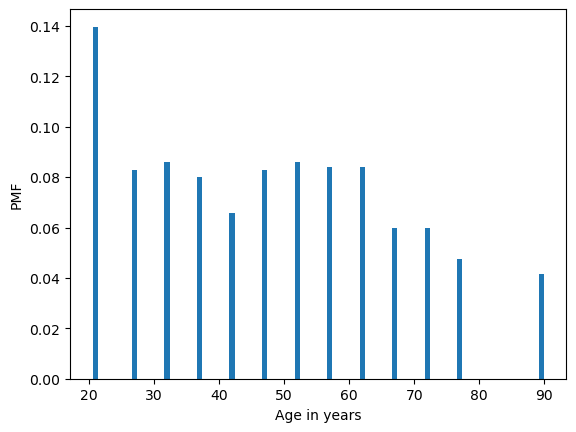

In [69]:
# Extract age
age = brfss['AGE']

# Plot the PMF
pmf_age = Pmf.from_seq(age)
pmf_age.bar(label  = 'age')

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.show()

## Scatter plot

Now let's make a scatterplot of weight versus age. To make the code run faster, I've selected only the first 1000 rows from the brfss DataFrame.

weight and age have already been extracted for you. Your job is to use plt.plot() to make a scatter plot.

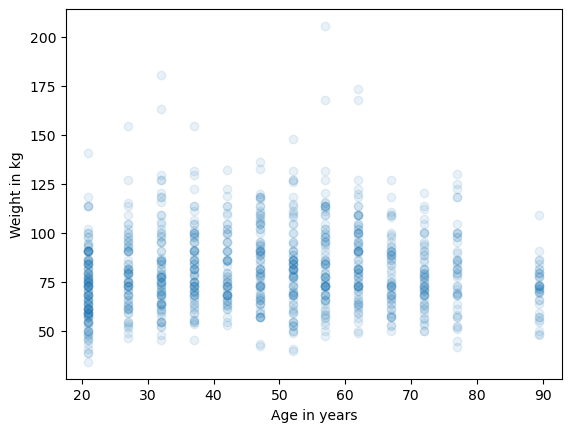

In [70]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', alpha=0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

## Jittering

In the previous exercise, the ages fall in columns because they've been rounded into 5-year bins. If we jitter them, the scatter plot will show the relationship more clearly. Recall how Allen jittered height and weight in the video:

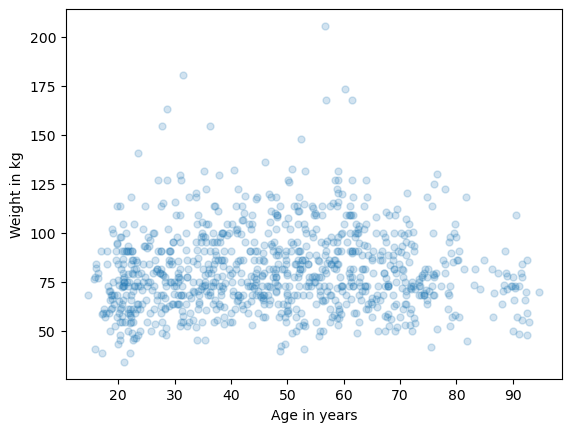

In [72]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Add jittering to age
age = brfss['AGE'] + np.random.normal(0, 2.5, size=len(brfss))
# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', markersize=5, alpha=0.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

## Visualizing relationships

### Violin plot

And there's a name for that; it's called a violin plot. Seaborn provides a function that makes violin plots, but before we can use it, we have to get rid of any rows with missing data. Here's how. dropna() creates a new DataFrame that contains the rows from brfss where AGE and WTKG3 are not NaN.

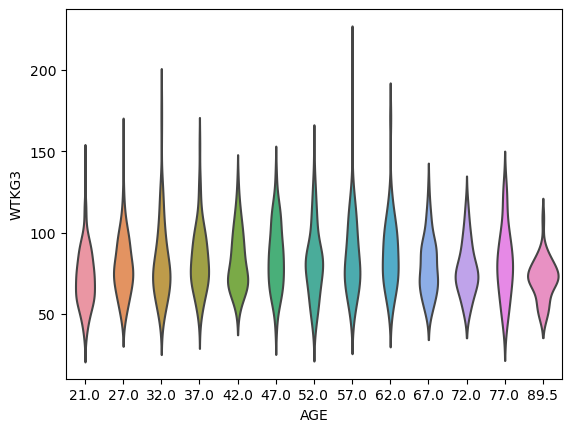

In [75]:
data = brfss.dropna(subset=['AGE', 'WTKG3'])
sns.violinplot(x='AGE', y='WTKG3', data=data, inner=None)
plt.show()

### Box plot

Each box represents the interquartile range, or IQR, from the 25th to the 75th percentile. The line in the middle of each box is the median. The spines sticking out of the top and bottom show the minimum and maximum values. In my opinion, this plot gives us the best view of the relationship between weight and age. Looking at the medians, it seems like people in their 40s are the heaviest; younger and older people are lighter. Looking at the sizes of the boxes, it seems like people in their 40s have the most variability in weight, too. These plots also show how skewed the distribution of weight is; that is, the heaviest people are much farther from the median than the lightest people.

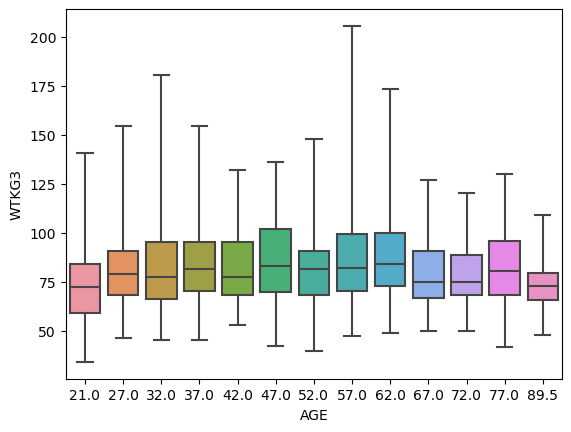

In [76]:
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.show()

### Box plot on log scale

For data that skews toward higher values, it is sometimes useful to look at it on a logarithmic scale. We can do that with the pyplot function yscale()

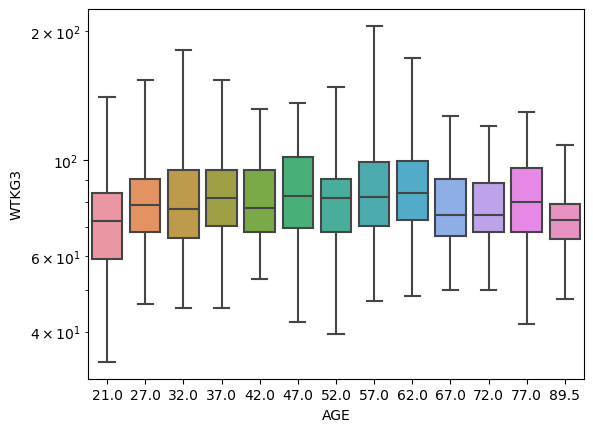

In [79]:
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.yscale('log')
plt.show()

### Height and weight

Previously we looked at a scatter plot of height and weight, and saw that taller people tend to be heavier. Now let's take a closer look using a box plot. The brfss DataFrame contains a variable '_HTMG10' that represents height in centimeters, binned into 10 cm groups.

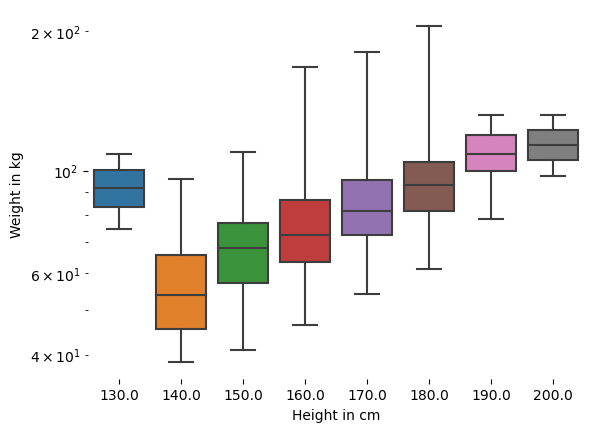

In [80]:
# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(x='_HTMG10', y='WTKG3', data=data, whis=10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

### Distribution of income

In the next two exercises we'll look at relationships between income and other variables. In the BRFSS, income is represented as a categorical variable; that is, respondents are assigned to one of 8 income categories. The variable name is 'INCOME2'. Before we connect income with anything else, let's look at the distribution by computing the PMF. Recall that all Pmf objects have a .bar() method.

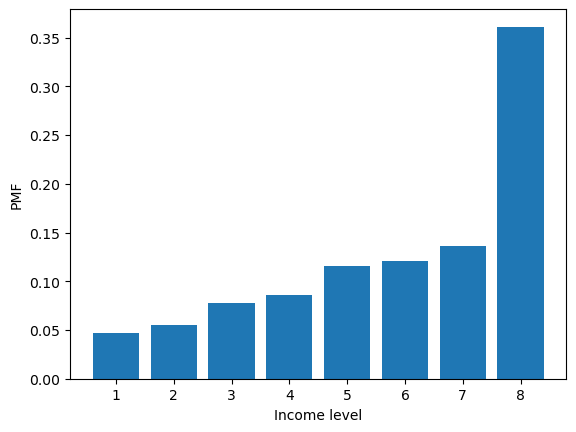

In [82]:
# Extract income
income = brfss['INCOME2']

# Plot the PMF
Pmf.from_seq(income).bar()

# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.show()

Almost half of the respondents are in the top income category, so this dataset doesn't distinguish between the highest incomes and the median. But maybe it can tell us something about people with incomes below the median.

#### Income and height

Let's now use a violin plot to visualize the relationship between income and height.
Create a violin plot to plot the distribution of height ('HTM4') in each income ('INCOME2') group. Specify inner=None to simplify the plot.

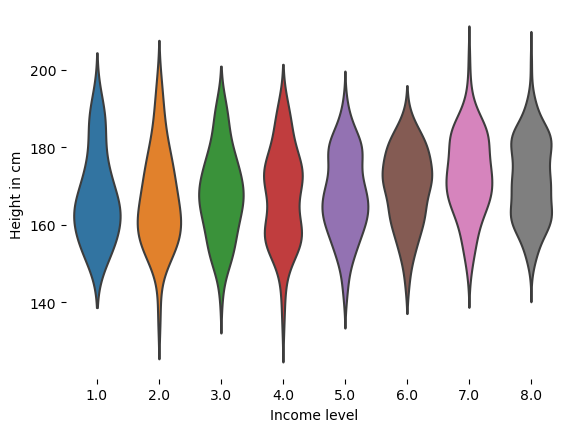

In [83]:
# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(x='INCOME2', y='HTM4', data=data, inner=None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()

It looks like there is a weak positive relationship between income and height, at least for incomes below the median.

#### Computing correlations

The purpose of the BRFSS is to explore health risk factors, so it includes questions about diet. The variable '_VEGESU1' represents the number of servings of vegetables respondents reported eating per day.

In [85]:
# Select columns
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss[columns]

# Compute the correlation matrix
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.014141 -0.021548
INCOME2  -0.014141  1.000000  0.115264
_VEGESU1 -0.021548  0.115264  1.000000


The correlation between income and vegetable consumption is small, but it suggests that there is a relationship. But a correlation close to 0 does mean there is no relationship.

### Simple regression

#### Income and vegetables
As we saw in a previous exercise, the variable '_VEGESU1' represents the number of vegetable servings respondents reported eating per day.

Let's estimate the slope of the relationship between vegetable consumption and income.

In [86]:
from scipy.stats import linregress

#Now we can compute the regression line. linregress() can't handle NaNs, 
#so we have to use dropna() to remove rows that are missing the data we need.

# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.07000027412424814, intercept=1.5413758521321235, rvalue=0.11526352353306701, pvalue=0.0015115444024927968, stderr=0.021983967667553426, intercept_stderr=0.1391883671176333)


#### Fit a line
Continuing from the previous exercise:

Assume that xs and ys contain income codes and daily vegetable consumption, respectively, and

res contains the results of a simple linear regression of ys onto xs.

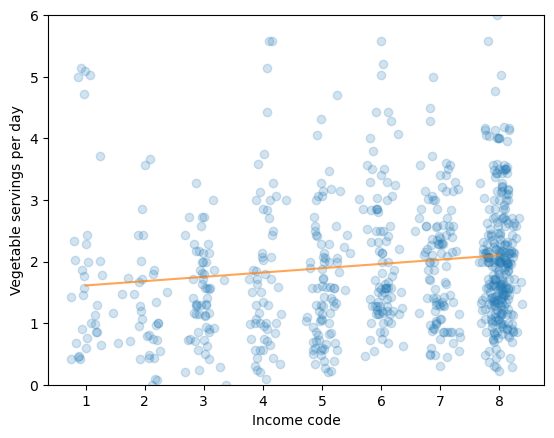

In [87]:
# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()

### Limits of simple regression

Correlation and simple regression can't measure non-linear relationships. But multiple regression can!!

#### Using StatsModels

Let's run the same regression using SciPy and StatsModels, and confirm we get the same results.

StatsModels: The first argument of ols() is a formula that specifies the variables in the regression. On the left,  is the variable we are trying to predict; on the right, is the variable we are using to inform the predictions.

In [90]:
# Run regression with linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs, ys)
print(res)

# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data = brfss).fit()
print(results.params)

LinregressResult(slope=0.07000027412424814, intercept=1.5413758521321235, rvalue=0.11526352353306701, pvalue=0.0015115444024927968, stderr=0.021983967667553426, intercept_stderr=0.1391883671176333)
Intercept    1.541376
INCOME2      0.070000
dtype: float64


#### Multiple regression

#### Plot income and education
To get a closer look at the relationship between income and education, let's use the variable 'educ' to group the data, then plot mean income in each group.

Here, the GSS dataset has been pre-loaded into a DataFrame called gss.

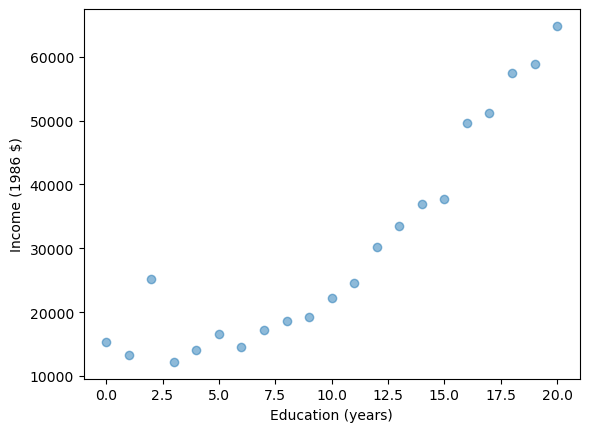

In [91]:
# Group by educ
grouped = gss.groupby('educ')

# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()

# Plot mean income as a scatter plot
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

It looks like the relationship between income and education is non-linear.

#### Non-linear model of education
The graph in the previous exercise suggests that the relationship between income and education is non-linear. So let's try fitting a non-linear model.

In [109]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [111]:
import statsmodels.formula.api as smf

# Add a new column with educ squared
gss['educ2'] = gss['educ']**2
gss['age2'] = gss['age']**2


# Run a regression model with educ, educ2, age, and age2
model = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss)
results = model.fit()

# Print the estimated parameters
print(results.params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


The slope associated with educ2 is positive, so the model curves upward.

### Visualizing regression results

#### Generating predictions
The regression results object provides a method called predict() that uses the model to generate predictions. It takes a DataFrame as a parameter and returns a Series with a prediction for each row in the DataFrame. To use it, I'll create a new DataFrame with age running from 18 to 85, and age2 set to age squared. Next, I'll pick a level for educ, like 12 years, which is the most common value. When you assign a single value to a column in a DataFrame, Pandas makes a copy for each respondent. Then we can use results to predict the average income for each age group, holding education constant.

In [123]:
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0,20)   #Using np.linspace(), add a variable named 'educ' to df with a range of values from 0 to 20.
df['age'] = 30     #Add a variable named 'age' with the constant value 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())

0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


For the constant variable, choose the most common value. When you assign a single value to a column in a DataFrame, Pandas makes a copy for each respondent. Then we can use results to predict the average income for each age group, holding education constant.

#### plotting predictions

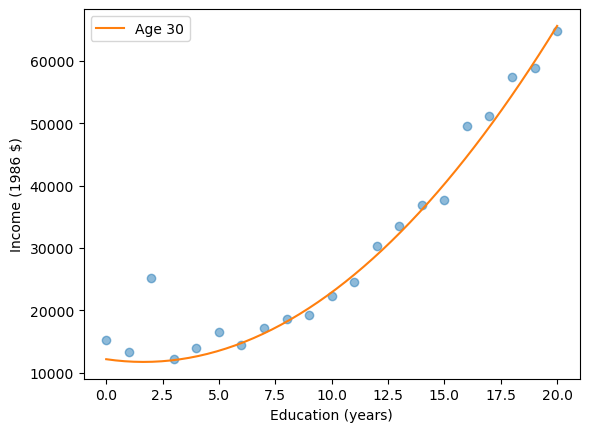

In [124]:
# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ, 'o', alpha=0.5)
# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'], pred, label='Age 30')
# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()


Looks like this model captures the relationship pretty well.

### Logistic regression

### Predicting a binary variable
Let's use logistic regression to predict a binary variable. Specifically, we'll use age, sex, and education level to predict support for legalizing cannabis (marijuana) in the U.S.

In the GSS dataset, the variable grass records the answer to the question "Do you think the use of marijuana should be made legal or not?"

In [125]:
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


Intercept     -1.685223
C(sex)[T.2]   -0.384611
age           -0.034756
age2           0.000192
educ           0.221860
educ2         -0.004163
dtype: float64

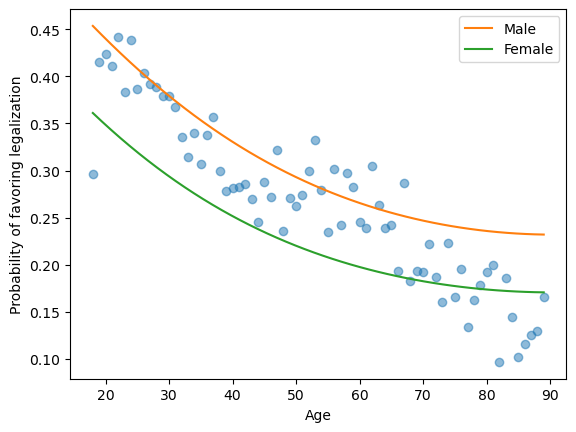

In [129]:
# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped['grass'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()